# Transfer Learning


Import Libraries

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Importing MobileNet v2 classifier from Tensorflow hub

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

Feature Extraction

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

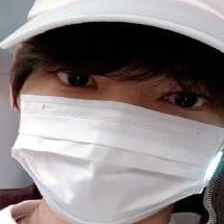

In [15]:

IMAGE_SHAPE = (224, 224)
mask = Image.open("0_0_006GRRUely1gayhiad6f5j31jk223kjl.jpg").resize(IMAGE_SHAPE)
mask

In [16]:
mask = np.array(mask)/255.0
mask.shape

(224, 224, 3)

In [17]:
mask[np.newaxis, ...]

array([[[[0.52156863, 0.58039216, 0.60784314],
         [0.51764706, 0.57647059, 0.60392157],
         [0.51372549, 0.57254902, 0.6       ],
         ...,
         [0.84313725, 0.80784314, 0.82745098],
         [0.84313725, 0.80784314, 0.82745098],
         [0.83921569, 0.80392157, 0.82352941]],

        [[0.52156863, 0.58039216, 0.60784314],
         [0.51764706, 0.57647059, 0.60392157],
         [0.51764706, 0.57647059, 0.60392157],
         ...,
         [0.83529412, 0.8       , 0.81960784],
         [0.83529412, 0.8       , 0.81960784],
         [0.83529412, 0.8       , 0.81960784]],

        [[0.5254902 , 0.58431373, 0.61176471],
         [0.52156863, 0.58039216, 0.60784314],
         [0.52156863, 0.57647059, 0.60784314],
         ...,
         [0.83137255, 0.79607843, 0.81568627],
         [0.83137255, 0.79607843, 0.81568627],
         [0.83529412, 0.8       , 0.81960784]],

        ...,

        [[1.        , 0.99607843, 1.        ],
         [1.        , 1.        , 1.        ]

In [18]:
result = model.predict(mask[np.newaxis, ...])
result.shape

(1, 1280)

In [19]:
predicted_label_index = np.argmax(result)
predicted_label_index

1

In [ ]:
image_labels = []
with open("./ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

In [ ]:
image_labels[predicted_label_index]

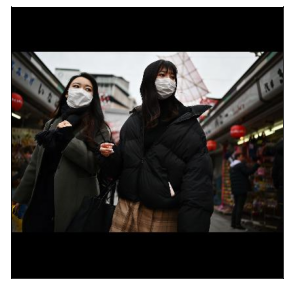

In [24]:
img="./work/3.jpeg"
image=cv2.imread(img)
plt.figure(figsize=(8,5))
 #Before showing image, bgr color order transformed to rgb order
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

Number of faces detected: 1
0


<Figure size 1080x1296 with 0 Axes>

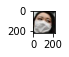

In [25]:
X=[]
def detect_face(img):
    face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_alt.xml')
 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    print('Number of faces detected:', len(faces))
 
    for (x,y,w,h) in faces:
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        
        roi_color = cv_rgb[y-3:y+h+3, x-3:x+w+3]
        
        resized_img = cv2.resize(roi_color,(224,224))
        plt.figure(figsize=(0.4,0.4))
        plt.imshow(resized_img)
        result = model.predict(resized_img[np.newaxis, ...])   
        predicted_label_index = np.argmax(result)
        print(predicted_label_index)
    return cv_rgb
plt.figure(figsize=(15,18))
c=detect_face(image)


In [ ]:
X = np.array(X)/255
X_train_scaled = X / 255
predictions = classifier.predict(X_train_scaled)
predictions

In [ ]:
from tensorflow.keras.applications import mobilenet

In [ ]:
m_model=mobilenet.MobileNet(weights='imagenet',include_top=False)

In [7]:
import pathlib
data_dir = pathlib.Path('E:/python/scripts/dataset')
data_dir

WindowsPath('E:/python/scripts/dataset')

In [8]:
face_mask_dict={
    'with_mask': list(data_dir.glob('with_mask/*')),
    'no_mask': list(data_dir.glob('without_mask/*'))
}

In [9]:
mask_label_dict={
    'with_mask' : 1,
    'no_mask' : 0
}

In [10]:
X, y = [], []

for mask,images in face_mask_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is not None:
            resized_img = cv2.resize(img,(224,224))
            X.append(resized_img)
            y.append(mask_label_dict[mask]) 

        

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
feature_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model = hub.KerasLayer(
    feature_model, input_shape=(224, 224, 3), trainable=True)

In [ ]:
X_train.shape

In [ ]:
batch=2857
num=2
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num,activation='softmax')
])
model.add(layers.MaxPooling2D())

In [ ]:
model.summary()

In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

In [ ]:
loaded_model = tf.keras.models.load_model('./mobilenet_1_0_224_tf_no_top.h5')

In [3]:
model=tf.keras.applications.MobileNetV2(input_shape=(224,224,3),weights='imagenet',include_top=False,pooling='max',classifier_activation='softmax')

In [ ]:
model.summary()

In [ ]:
last_model=keras.Sequential(
    [
        model,
        layers.Dense(2,activation='softmax'),
        layers.Dense(1,activation='softmax')
    ]
)

In [4]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [13]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
90/90 [==============================] - 776s 8s/step - loss: 3.7181 - accuracy: 0.7652
Epoch 2/5
90/90 [==============================] - 720s 8s/step - loss: 1.5139 - accuracy: 0.9826
Epoch 3/5
90/90 [==============================] - 706s 8s/step - loss: 1.4605 - accuracy: 0.9344
Epoch 4/5
90/90 [==============================] - 704s 8s/step - loss: 1.4678 - accuracy: 0.9623
Epoch 5/5
90/90 [==============================] - 696s 8s/step - loss: 1.4467 - accuracy: 0.9806


In [14]:
model.evaluate(X_test,y_test)

30/30 [==============================] - 46s 1s/step - loss: 6.5182 - accuracy: 0.9108


[6.518248081207275, 0.9108079671859741]